<a href="https://colab.research.google.com/github/priyankadri/netflix_movies_tv_shows/blob/main/netflix_movies_and_tv_shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name - Netflix Movies And TV Shows Clustering

Project Type - Unsupervised

Contribution - Individual

Project Summary -


Netflix is a popular streaming service that provides its subscribers with a wide range of movies, TV shows, documentaries, and original content to watch on demand. The company was founded in 1997 as a DVD rental service but later pivoted to an online streaming model in 2007. Since then, Netflix has grown into one of the most popular streaming services globally, with over 200 million subscribers in more than 190 countries as of 2021.

Netflix's success is due in part to its innovative business model and emphasis on creating original content. The company invests heavily in producing its own movies and TV shows, which have won numerous awards and attracted high-profile talent. Netflix also uses sophisticated algorithms to recommend content to its users, based on their viewing history and preferences.

This project aimed to identify patterns in the content available on the platform and group them into clusters based on similarities in their genres, sub-genres, release year, and other features. The project utilized machine learning algorithms such as K-means clustering and Hierarchical Clustering to cluster the data.
Problem Statement

This dataset contains tv shows and movies available on Netflix as of 2019. The data is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of tv shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2000 titles since 2010, while its number of tv shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In this project, i'm going to do

Exploratory Data Analysis

Understanding what types of content are available in different countries.

If Netflix has been increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features.

Let's Begin !

In [93]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import datetime as dt

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from  sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

In [94]:
df=pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [95]:
# top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [96]:
# dataframe shape
df.shape

(7787, 12)

In [97]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [98]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [99]:
# unique values in each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [115]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7777 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7777 .
No. of unique values in  director is 4050 .
No. of unique values in  cast is 6822 .
No. of unique values in  country is 682 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 491 .
No. of unique values in  description is 7759 .


In [100]:
# Checking for duplicate records
df.duplicated().value_counts()

False    7787
dtype: int64

<Axes: >

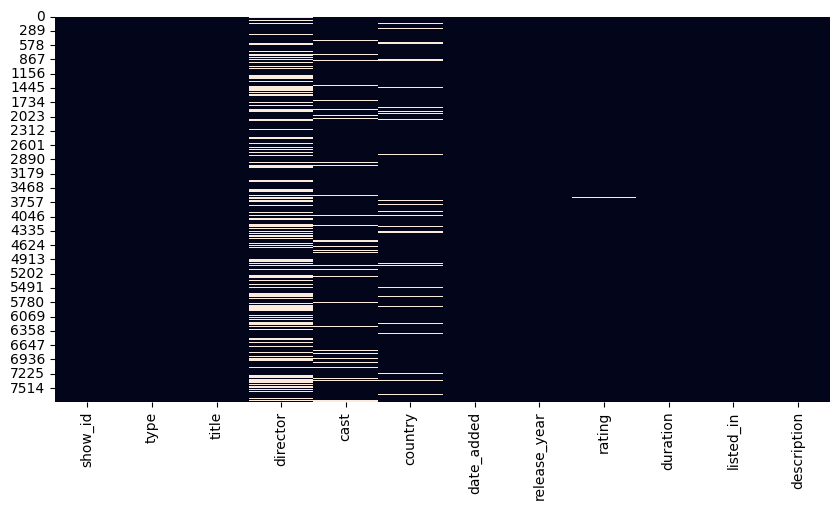

In [101]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

**This dataset contains 7787 observations with 12 features. It has some null values present in director, cast, country, date_added, and rating.**

In [102]:
# Missing values in the dataset
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [111]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)



In [116]:
# checking the null value counts again.
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [112]:
df.shape

(7777, 12)

We have successfully handled all the missing values in the dataset.

In [127]:
# Top countries
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [ ]:
# Genre of shows
df.listed_in.value_counts()


Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
Also, let's consider only the primary genre of the respective movie / TV show.

In [129]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])





In [130]:
# contry in which a movie was produced
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [131]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

**Understanding the rating value.**

In [117]:
# rating value counts.
df['rating'].value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [118]:
# converting rating into understandable format.

rename_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Kids',
    'TV-Y7': 'Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['rating'] =df['rating'].replace(to_replace = rename_rating)
df['rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [145]:
# converting date_added column to date time and extracting the day, month and year from the column.
df['date_added'] = pd.to_datetime(df['date_added'])

# extracting day, month and year.
df['added_day'] = df['date_added'].dt.day

df['added_month'] = df['date_added'].dt.month

df['added_year'] = df['date_added'].dt.year


In [146]:
# columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_day', 'added_month', 'added_year'],
      dtype='object')

In [132]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [133]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [134]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [135]:
# datatype of duration
df.duration.dtype

dtype('int64')

**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

<Axes: xlabel='type', ylabel='count'>

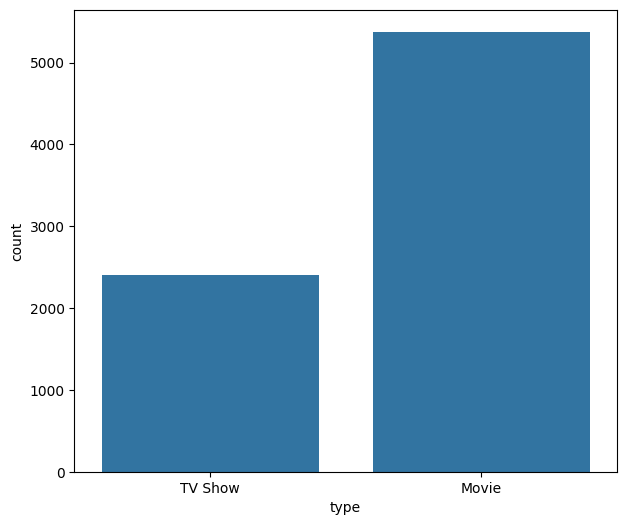

In [136]:
from matplotlib import figure
# type counts.
plt.figure(figsize = (7,6))
sns.countplot(x = 'type', data = df)

**I picked a count plot here to see the total counts of each show.
We can clearly see in the count plot here that most of the content added is movies which are approximately 5000. Nearly 2500 contents are TV Shows.**

<Axes: xlabel='Country Name', ylabel='Total number of production'>

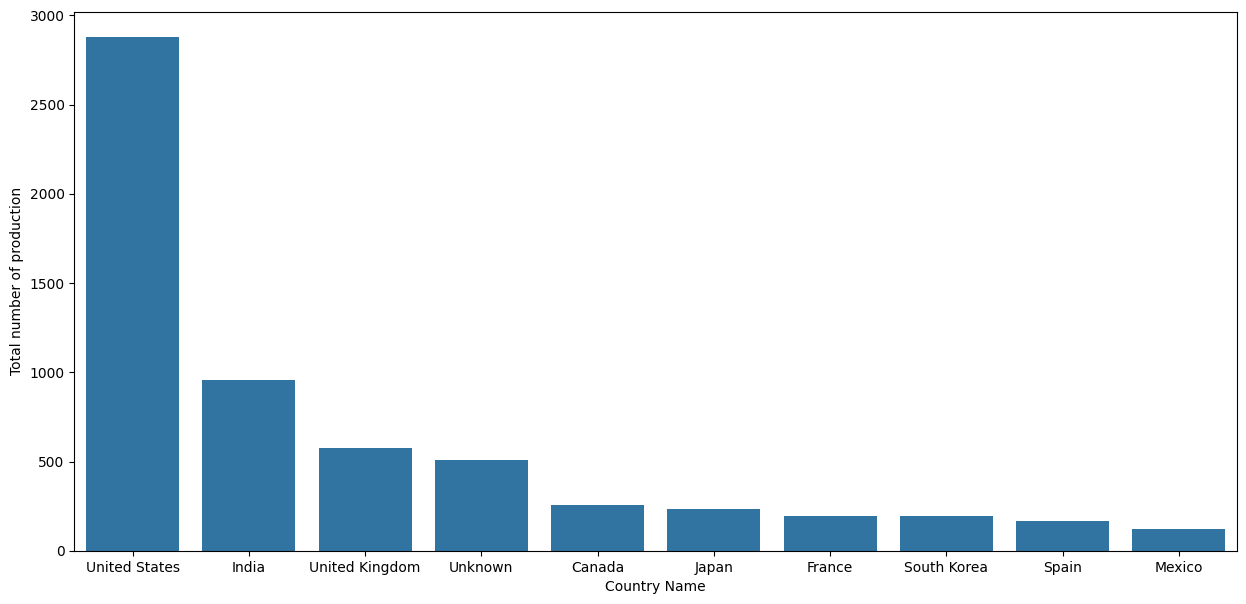

In [138]:
# top ten countries based on number of tv shows and moviews production.
top_countries = df['country'].value_counts().sort_values(ascending = False).reset_index().head(10)
top_countries.rename(columns = {'index':'Country Name', 'country':'Total number of production'}, inplace = True)
plt.figure(figsize = (15,7))
sns.barplot(data = top_countries, x = 'Country Name', y = 'Total number of production')


The highest number of movies / TV shows were based out of the US, followed by India and UK.

<Axes: xlabel='count', ylabel='listed_in'>

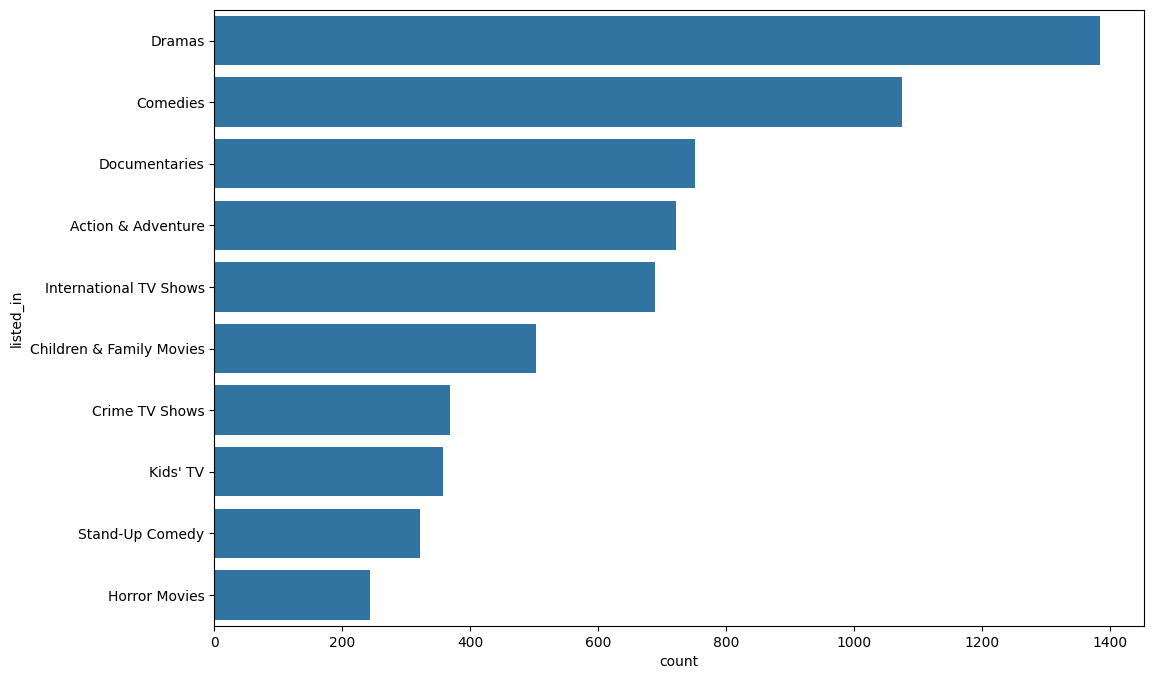

In [139]:
# visualization oftop ten genres.
plt.figure(figsize = (12,8))
sns.countplot(y=df['listed_in'], data=df, order = df['listed_in'].value_counts().index[:10])

In [140]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [141]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

The top 3 countries together account for about 56% of all movies and TV shows in the dataset.
This value increases to about 78% for top ten countries.

In [142]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [143]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

The dramas is the most popular genre followed by comedies and documentaries.

These three genres account for about 41% of all movies and TV shows.

This value increases to about 82% for top 10 genres.

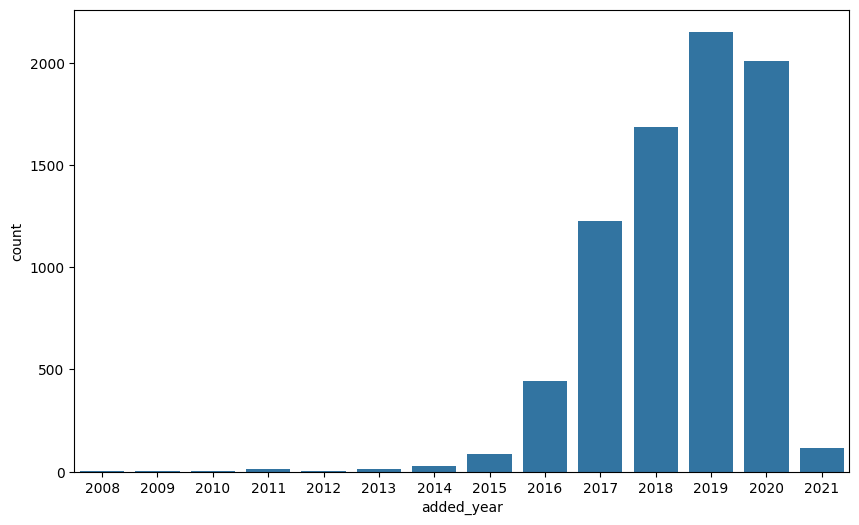

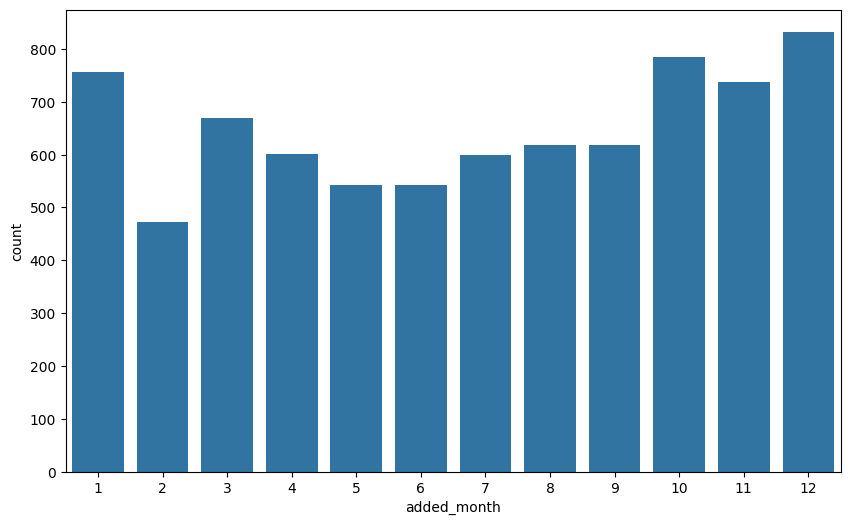

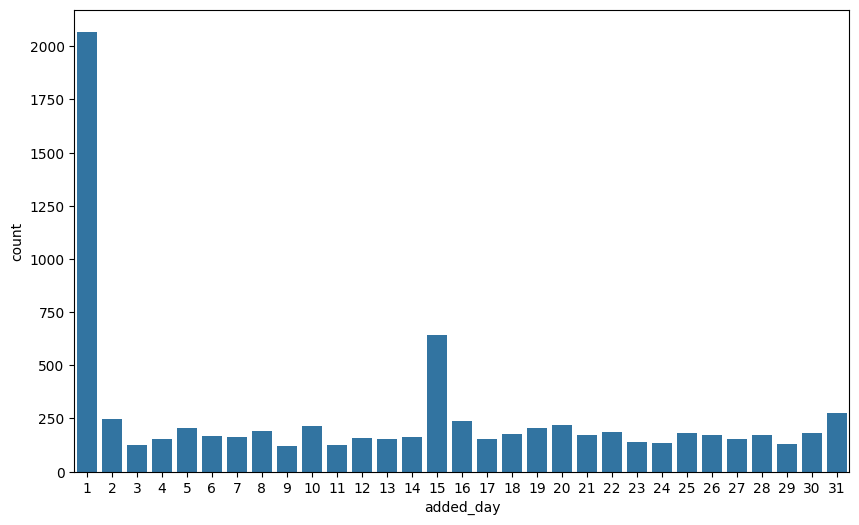

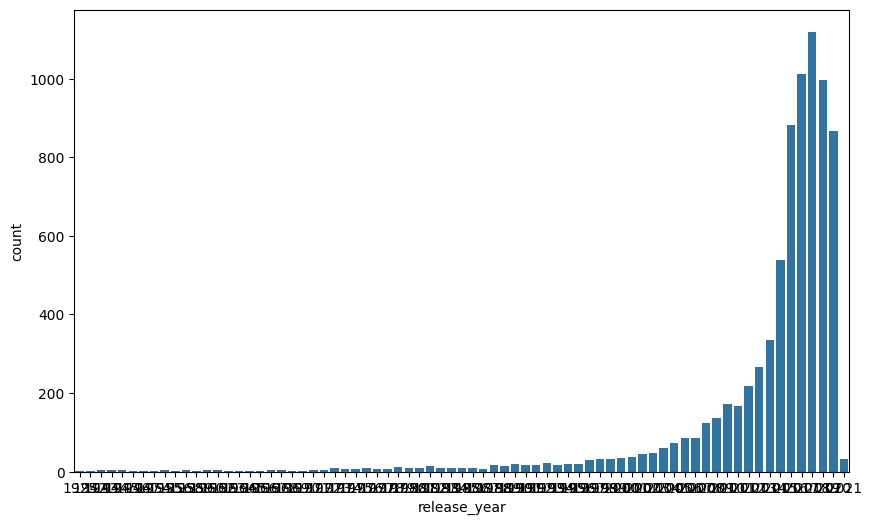

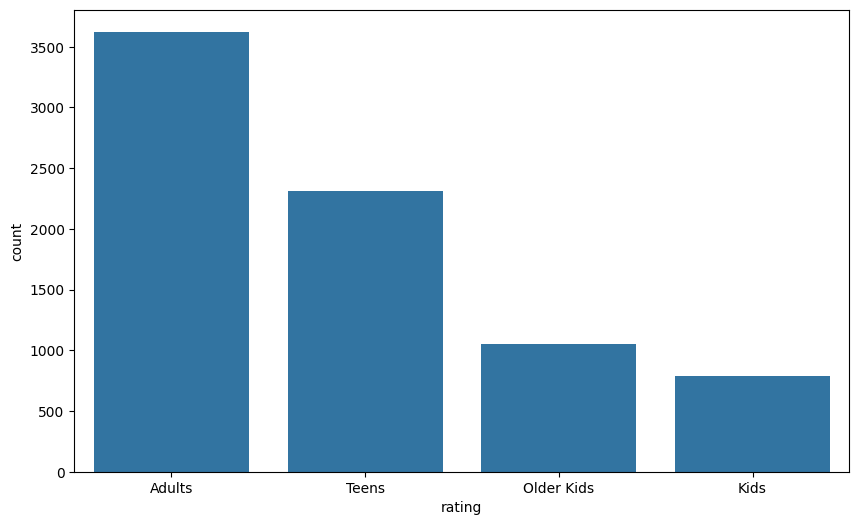

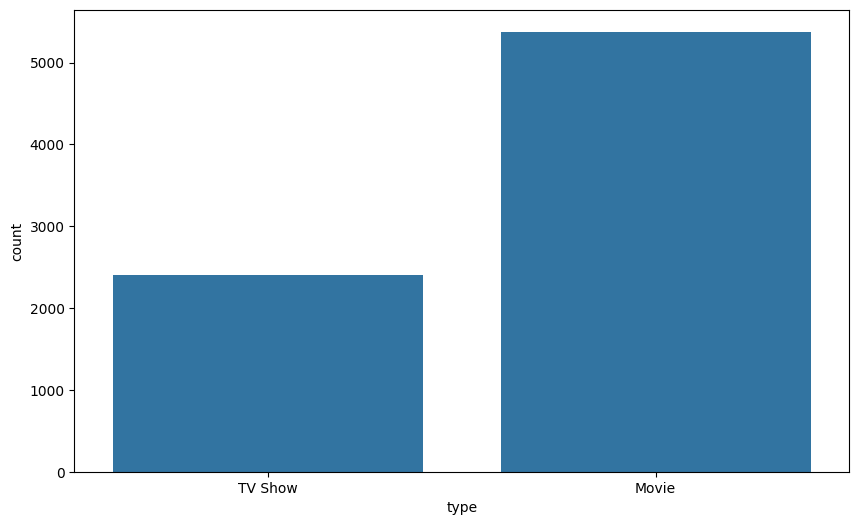

In [147]:
# visualizing the.
var = ['added_year', 'added_month', 'added_day', 'release_year', 'rating', 'type']

# years with total contents added.
for col in var:
  plt.figure(figsize = (10,6))
  sns.countplot(x = col, data = df)

added_year :- Most of the content on Netflix is added in 2018, 2019, and 2020. In which 2019 the maximum number of contents are added. this was the time when Netflix became prevalent among people. Very few contents are added in 2021 because of the pandemic.

added_month :- Most of the content on Netflix is added in the month of October, November, December, and January. In which most numbers of the contents are added in the month of December. It is evident that in December, peoples usually have vacations that are the reason.

added_day :- Maximum contents are added on the first day of the month followed by the 15th day of the month.

release_year :-The number of contents released per year was increasing constantly but it got decreased in 2021. the reason was none other than the corona various pandemic in which everyone was following the restrictions to curb this virus from spreading.

rating :- Maximum contents of Netflix are only for adults followed by teens. Very few contents are available for kids on Netflix.

type :- Most of the content on Netflix is movies which are approximately 5000. the number of tv shows around 2500 on this platform.

In [42]:
# count of unique director
df['director'].nunique()

4050

In [43]:
# top directors.
df['director'].value_counts()

Unknown                   2379
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Andrew C. Erin               1
Vibhu Virender Puri          1
Lucien Jean-Baptiste         1
Jason Krawczyk               1
Sam Dunn                     1
Name: director, Length: 4050, dtype: int64

<Axes: xlabel='count', ylabel='director'>

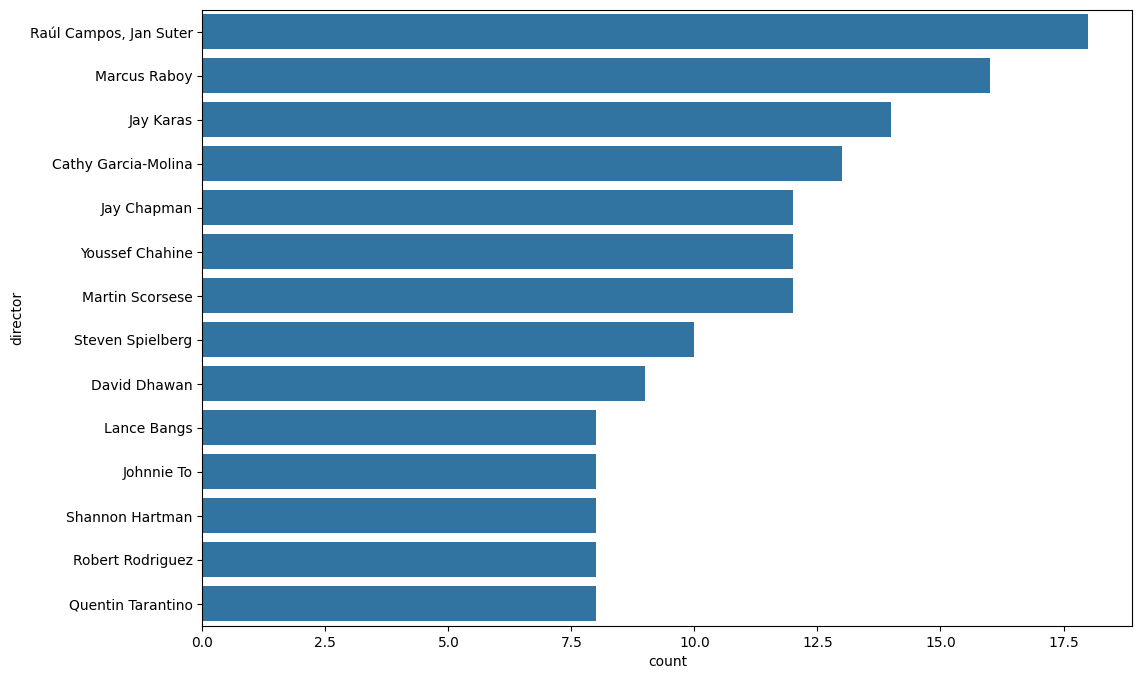

In [44]:
# visualization
plt.figure(figsize=(12,8))
sns.countplot(y=df['director'], data = df, order = df['director'].value_counts().index[1:15])

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

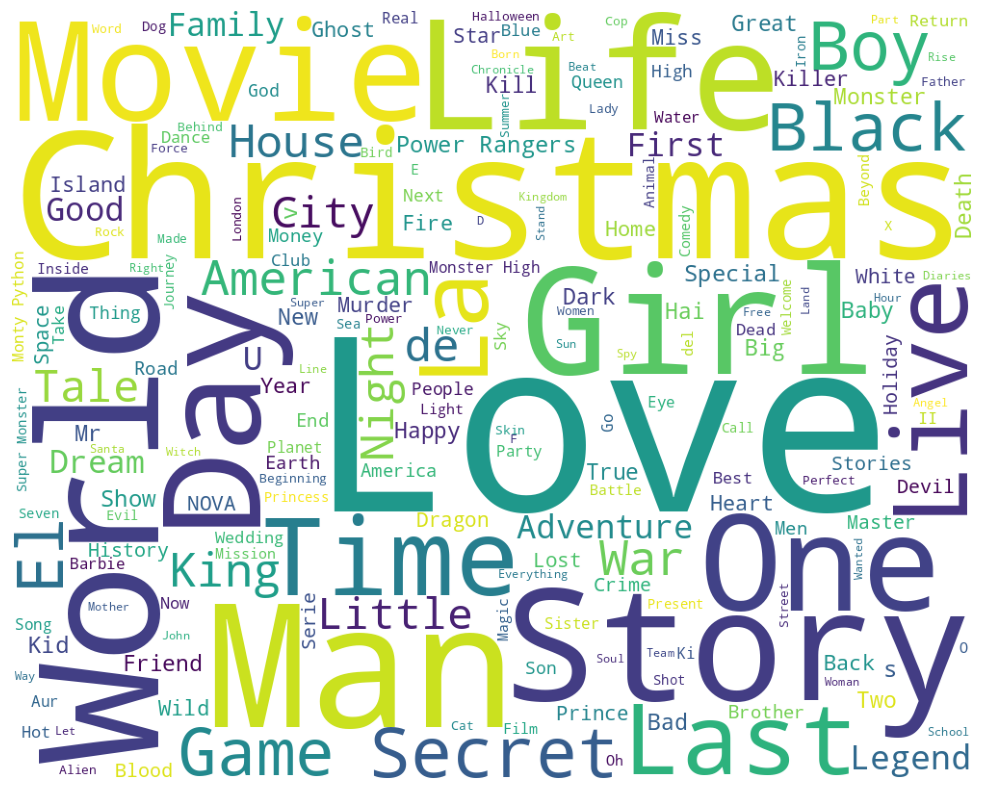

In [45]:
# most frequent words used in titles.
#Importing wordcloud
from wordcloud import WordCloud, STOPWORDS

#Most occurred word in title
plt.subplots(figsize=(20,10))
stopwords = set(STOPWORDS)
text = " ".join(df.title)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',width=1000,height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



Christmas, love, world, story, life, girl, etc are the most frequent words used in the title of the contents.


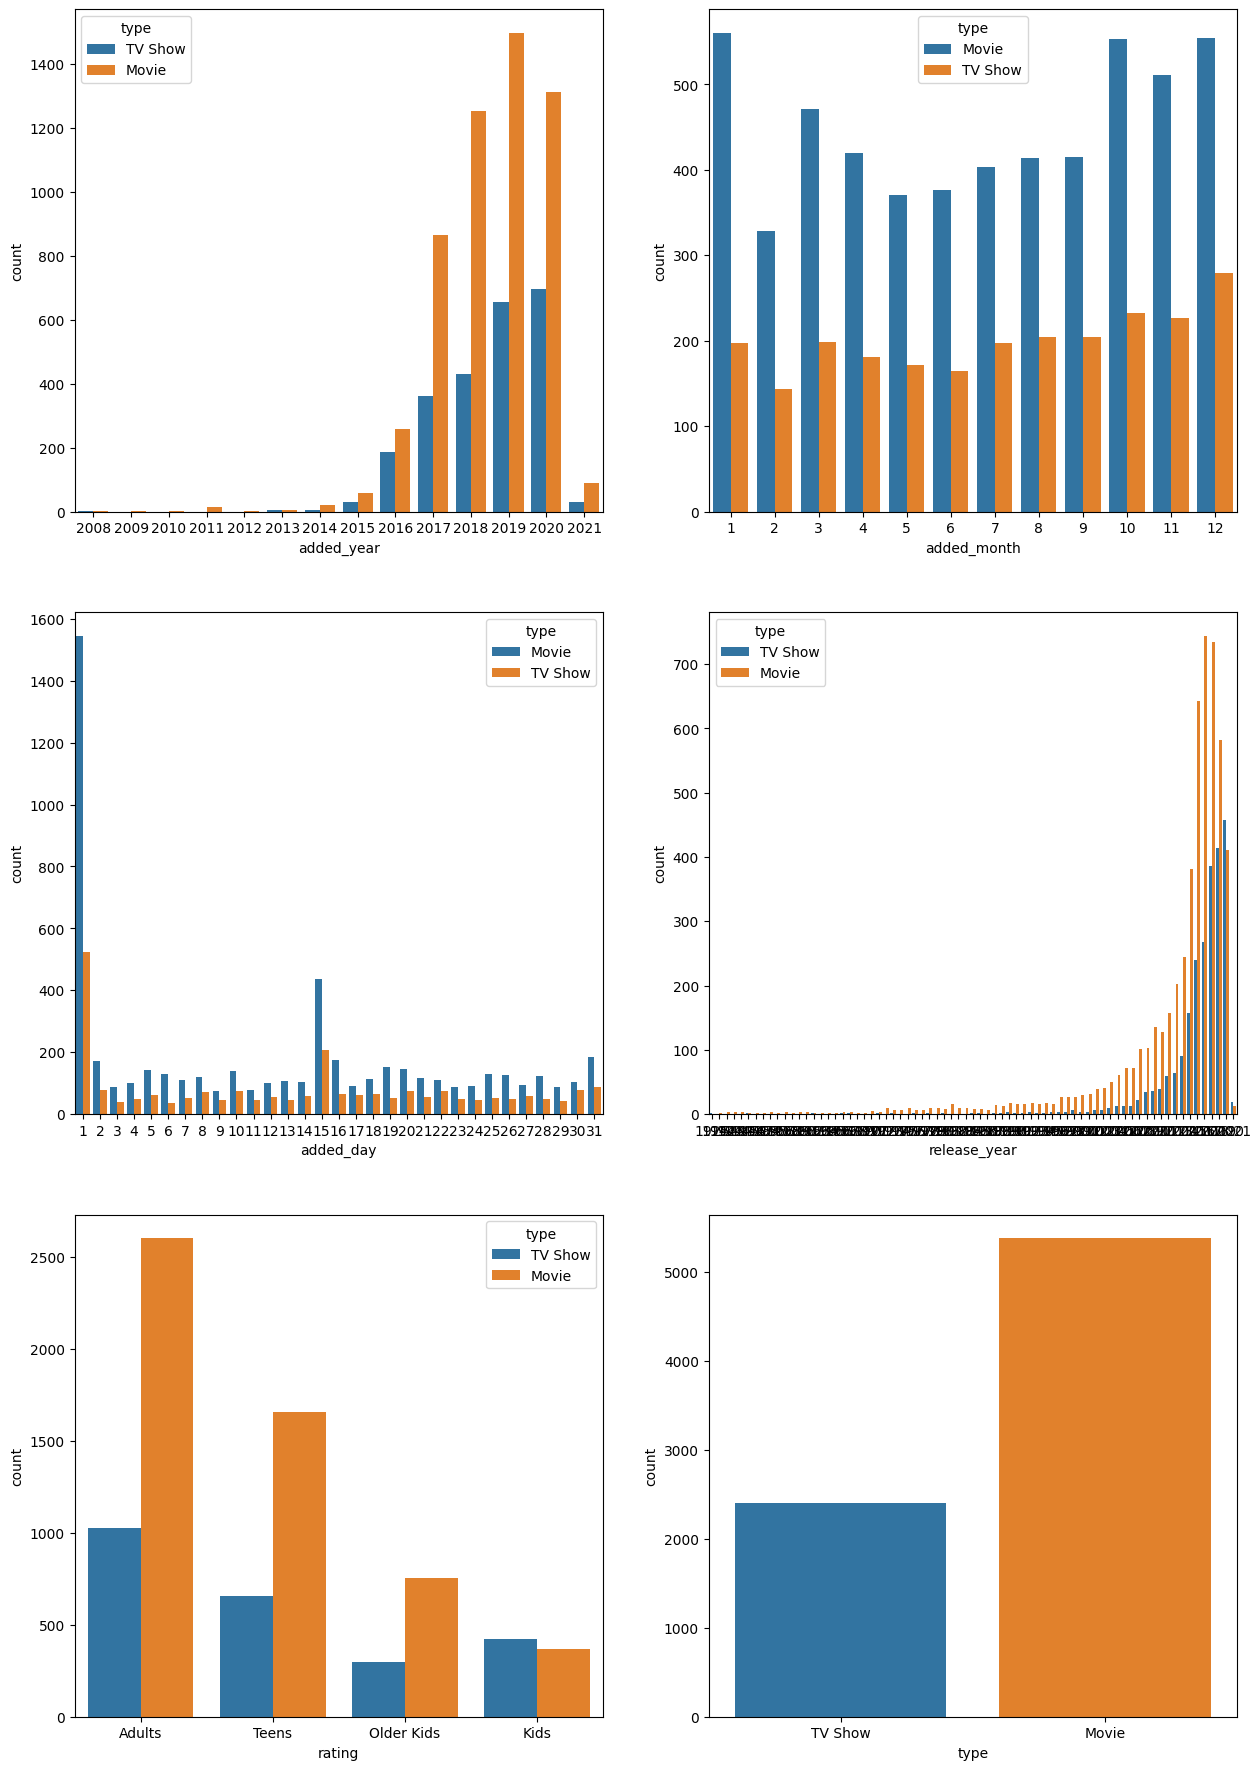

In [159]:
# counts wrt type of the content.
plt.figure(figsize=(15,30))
for i in enumerate(var):
  plt.subplot(4, 2, i[0]+1)
  sns.countplot(x = i[1], hue = 'type', data = df)


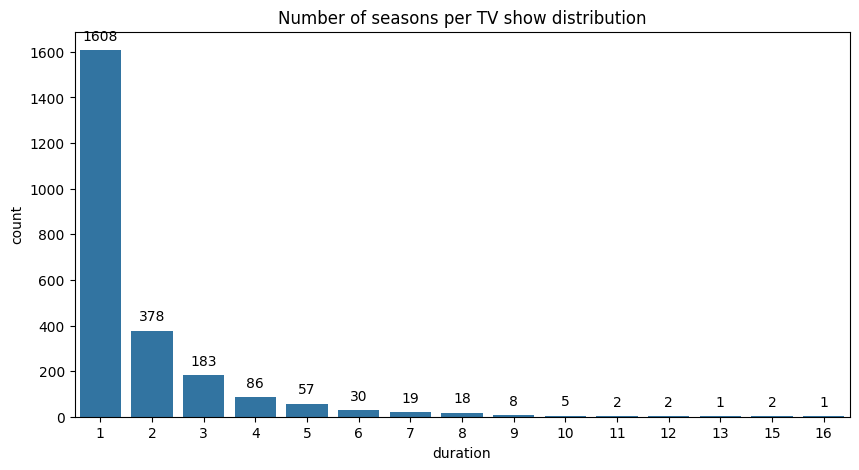

In [160]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [161]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100


67.0

The TV series in the dataset have up to 16 seasons, however the bulk of them only have one.

This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.

There are very few TV shows that have more than 8 seasons.

Text(0.5, 1.0, 'Movie duration distribution')

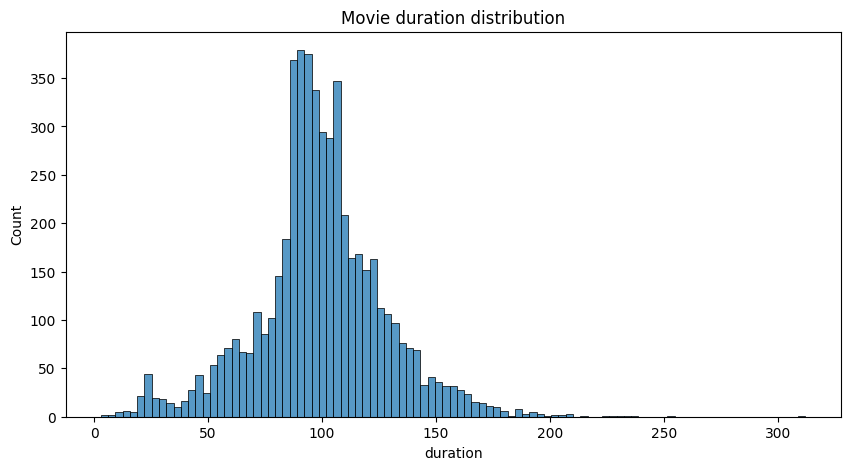

In [162]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [163]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()


count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

Text(0.5, 0, 'Year')

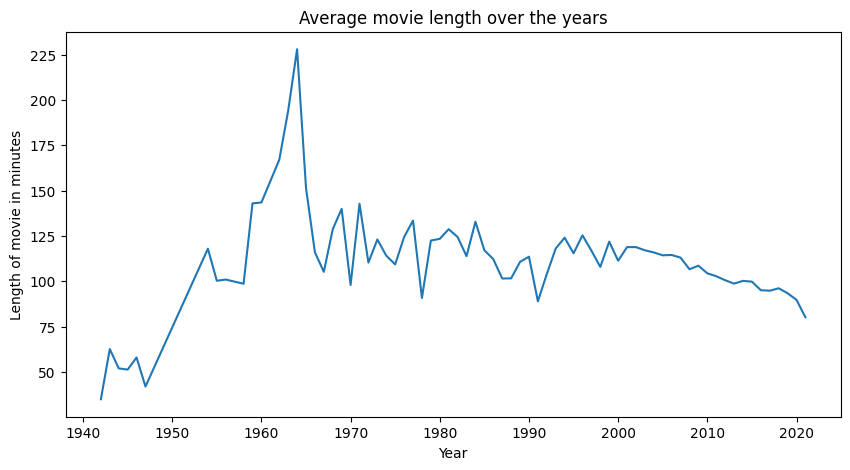

In [164]:
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')


In [165]:
# Movie release year statistics
df[df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

Netflix has several movies on its site, including those that were released in way back 1942.

As per the plot, movies made in the 1940s had a fairly short duration on average.

On average, movies made in the 1960s have the longest movie length.
The average length of a movie has been continuously decreasing since the 2000s.

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

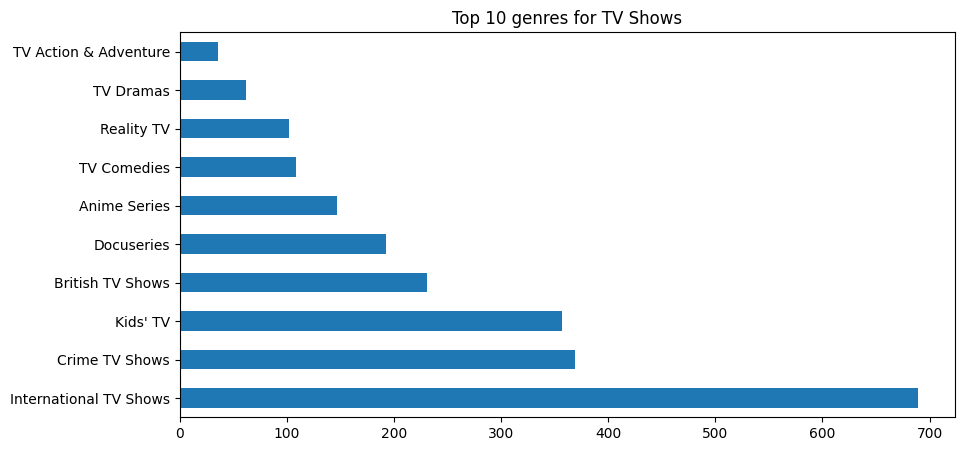

In [166]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

International, crime, and kids are the most popular genre for TV shows on Netflix.

Text(0.5, 1.0, 'Top 10 TV show directors')

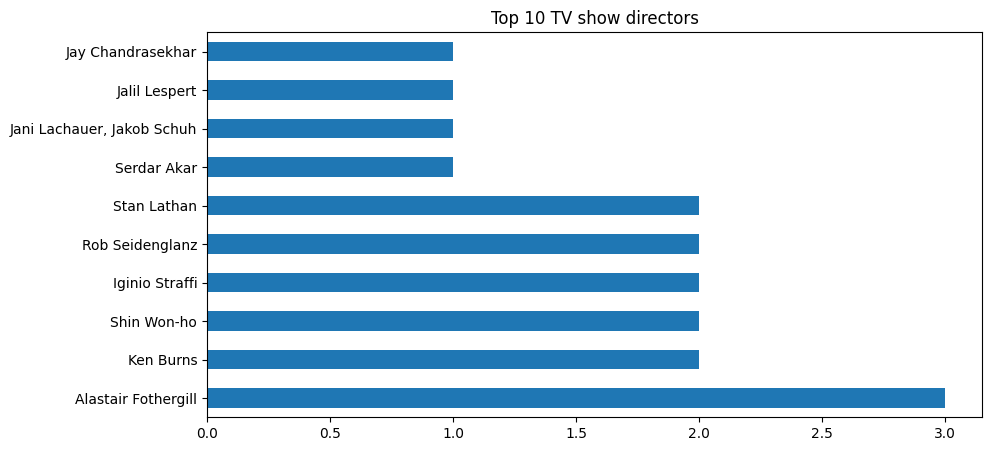

In [167]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

Alastair Fothergill has directed three TV shows, the most of any director.

Only six directors have directed more than one television show.

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

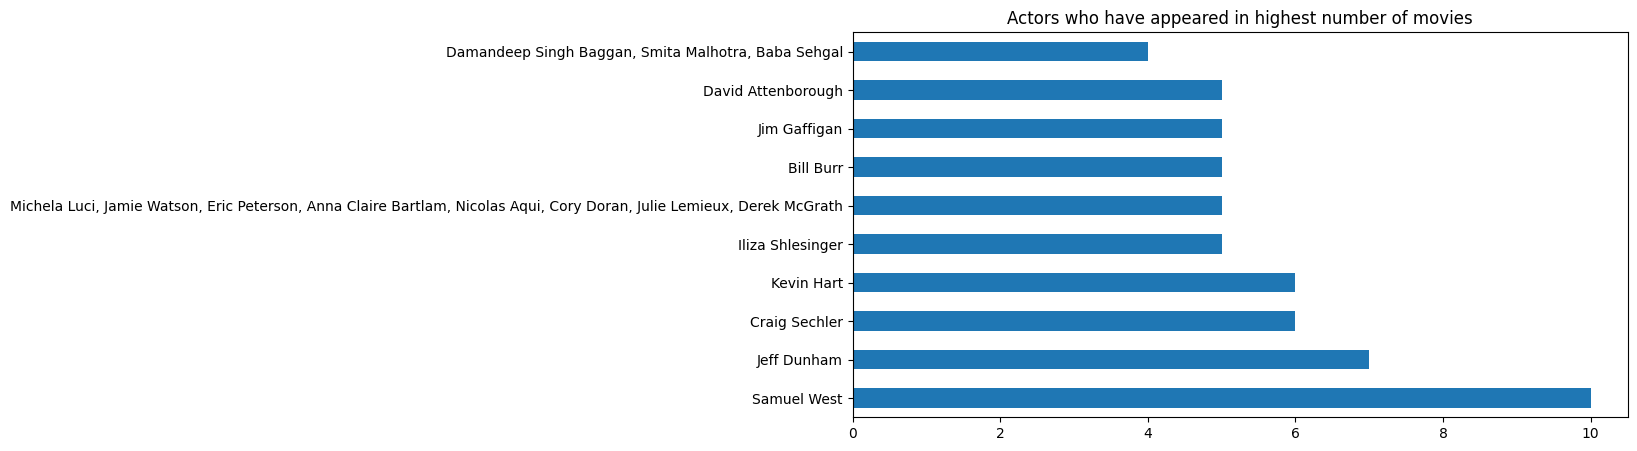

In [168]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')


Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

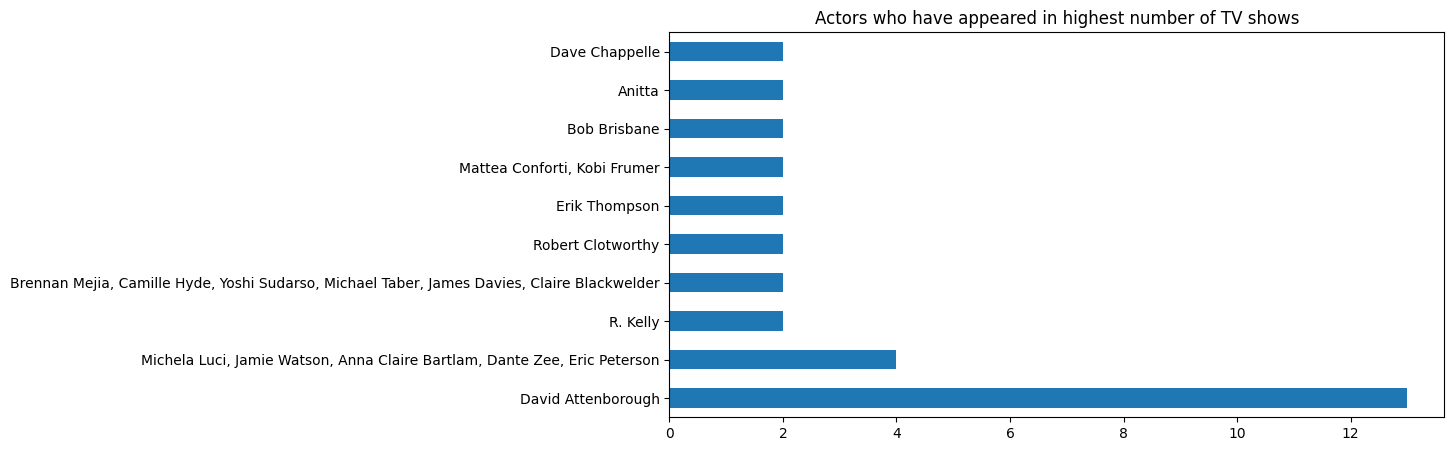

In [169]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')


David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.

<Axes: xlabel='country', ylabel='count'>

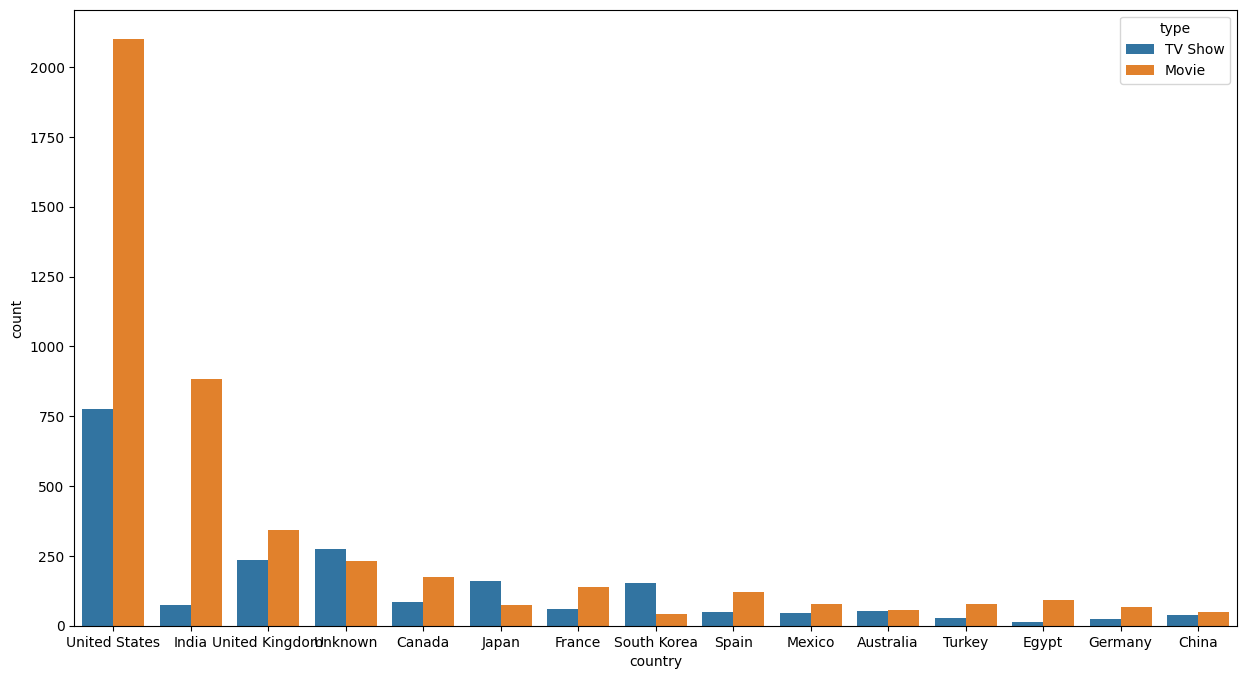

In [170]:
# total production of country wrt type of the content.
plt.figure(figsize=(15,8))
sns.countplot(x = df['country'], hue='type', data = df, order = df['country'].value_counts().index[:15])

US has the most number of movies and tv shows type content. While India comes in second place for movies on Netflix. But UK comes in second place in terms of tv shows. Followed by South Korea and Canada. Other countries have a very less number of contents added on Netflix.

# Feature Engineering

There are no outliers in the data so I don't have to handle any outliers here. While I cleaned the data completely in the data wrangling section. Like handled the null values, converted the ratings into an understandable format, and extracted the date data from date_added column.

# Textual Data Preprocessing

In [171]:

df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_day', 'added_month', 'added_year'],
      dtype='object')

In [172]:
# combinig the textual data to proceed with NLP
df['text'] = df['cast']+df['listed_in']+df['rating']+df['description']+df['director']+df['rating']+df['country']
df['text'][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiInternational TV ShowsAdultsIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.UnknownAdultsBrazil'

# Function to remove punctuation and stopwords.

In [173]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [174]:
# applying function to remove punctuation.
df['text']=df['text'].apply(remove_punctuation)
df['text'][0]


'João Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso FrateschiInternational TV ShowsAdultsIn a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalorUnknownAdultsBrazil'

# Removing stopwords

In [175]:
# downloading stop words.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [176]:
# assigning the stopwords to a variable
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [177]:
# function to remove stopwords from a given text
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [178]:
# applying the function on text data.
df['text'] = df['text'].apply(remove_stopwords)
df['text'][0]


'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschiinternational tv showsadultsin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorunknownadultsbrazil'

#Stemming operations

In [179]:
# function for stemming and lemmatization.
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [180]:
# applying the function on text data.
df['text'] = df['text'].apply(stemming)
df['text'][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschiintern tv showsadultsin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorunknownadultsbrazil'

In [181]:
# tfidf object initialization
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fitting the vectorizer using the text data
tfidf.fit(df['text'])

# collecting the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()


In [182]:
# converting vector into array form for clustering
X = tfidf.transform(df['text']).toarray()

# summarize encoded vector
print(X)
print(f'shape of the vector : {X.shape}')
print(f'datatype : {type(X)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7777, 10000)
datatype : <class 'numpy.ndarray'>


#Applying PCA to reduce dimension

In [ ]:
# initializing instance of PCA.
pca = PCA(random_state=42)
pca.fit(X)

In [ ]:
# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.axhline(y= 0.9, color='red', linestyle='--')
plt.axvline(x= 4000, color='green', linestyle='--')
plt.show()